# Langevin Equations with Exponentially Decaying Memory Driven by Ornstein-Uhlenbeck Noise

Consider the Langevin equation: $$\ddot{x}_{t} = \frac{f(x_{t})\eta_{t}}{\tau \epsilon^{1+\mu}} - \frac{g(x_{t})}{\tau \beta \epsilon^{\mu+2}} \int_{0}^{t} e^{-\frac{\alpha}{\epsilon^{2}}\left(t-s\right)} g(x_{s}) \dot{x}_{s} ds,$$
where $f(x_{t})$, $g(x_{t})$ are some sufficiently smooth functions that might depend on $x_{t}$, $\mu$ and $\tau$ are some constants, $\epsilon$ is a small positive constant, $\beta := 2\alpha/\lambda$ and $\eta_{t}$ is the Ornstein-Uhlenbeck process satisfying the SDE:
$$\dot{\eta}_{t} = -\frac{\alpha}{\epsilon^{2}}\eta_{t} + \frac{\sqrt{\lambda}}{\epsilon} \dot{W}_{t}. $$
Here $W_{t}$ denotes the standard Brownian motion, $\alpha$ and $\lambda$ are positive constants and we have set the mass $m := \epsilon^{\mu}$. 

Defining the auxiliary stochastic process $$y_{t} = \frac{1}{\beta \epsilon}\int_{0}^{t} e^{-\frac{\alpha}{\epsilon^{2}}\left(t-s\right)} g(x_{s}) \dot{x}_{s} ds,$$ we can rewrite the above (non-Markovian) Langevin equation as the following system of SDEs:
\begin{align*}
\dot{x}_{t} &= v_{t}, \\
\dot{v}_{t} &= \frac{1}{\tau \epsilon^{\mu+1}}\left(f(x_{t})\eta_{t} - g(x_{t}) y_{t} \right), \\
\dot{y}_{t} &= -\frac{\alpha}{\epsilon^{2}} y_{t} + \frac{1}{\epsilon \beta} g(x_{t}) v_{t},  \\
\dot{\eta}_{t} &= -\frac{\alpha}{\epsilon^{2}} \eta_{t} + \frac{\sqrt{\lambda}}{\epsilon} \dot{W}_{t}.
\end{align*}

Setting $\mu=2$, we are interested in the limiting solution when $\epsilon \to 0$. This corresponds to the situation when the mass $m$ and the noise correlation time (which is of the order $\epsilon^{2}$) go to zero at the same rate. Analytically, it can be shown that the limiting solution satisfies the following SDE for $x_{t}$:
$$dx_{t} = \frac{4\alpha^{2}}{\lambda} \left[\lambda \frac{gff'-f^{2}g'}{g^{3}(\lambda g^{2}+4\tau \alpha^{3})}-\frac{f^{2}g'}{g^{5}} \right] dt + \sqrt{\frac{4\alpha^{2}}{\lambda}} \frac{f}{g^{2}} dW_{t},$$
where it is understood that $f=f(x_{t})$, $g=g(x_{t})$, etc. and $'$ denotes derivative wrt $x_{t}$.

For numerical solutions, we set $\tau=1$, $\alpha=\lambda=2$ and take the initial conditions $x_{0}=v_{0}=\eta_{0}=2$.

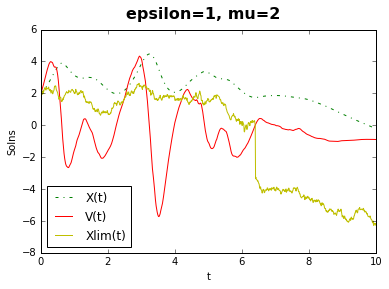

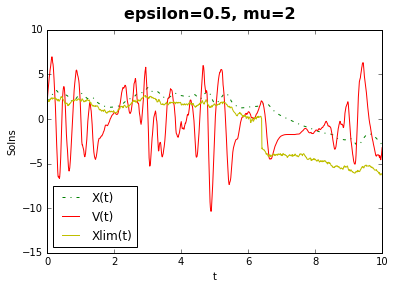

In [9]:
%matplotlib inline
import math
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# Set up grid
T=10.0
N=1000
t,dt=np.linspace(0,T,N+1,retstep=True)

# Get Brownian motion
dW=npr.normal(0.0, np.sqrt(dt),N+1)
dW[0]=0.0
W=np.cumsum(dW)

# Equation parameters and functions
Xzero=2.0
Vzero=2.0
etazero=2.0
tau=1.0
mu=2.0
alpha=2.0
lamda=2.0
beta=2*alpha/lamda
epsilon1=1
epsilon2=0.5
def f(X): return X**2
def fd(X): return 2.0*X
def g(X): return fd(X)
def gd(X): return 2.0

# Prelimit Solution
Xmil1=np.empty_like(t)
Vmil1=np.empty_like(t)
Ymil1=np.empty_like(t)
etamil1=np.empty_like(t)
Xmil1[0]=Xzero
Vmil1[0]=Vzero
Ymil1[0]=0.0
etamil1[0]=etazero

Xmil2=np.empty_like(t)
Vmil2=np.empty_like(t)
Ymil2=np.empty_like(t)
etamil2=np.empty_like(t)
Xmil2[0]=Xzero
Vmil2[0]=Vzero
Ymil2[0]=0.0
etamil2[0]=etazero

# Limiting Solution
Xlim=np.empty_like(t)
Xlim[0]=Xzero
def alim(X): return (4*alpha**2/lamda)*(lamda*(g(X)*f(X)*fd(X)-f(X)**2*gd(X))/(g(X)**3*(lamda*g(X)**2+4*tau*alpha**3))-f(X)**2*gd(X)/g(X)**5)
def blim(X): return math.sqrt(4*alpha**2/lamda)*f(X)/g(X)**2
def blimd(X): return math.sqrt(4*alpha**2/lamda)*(g(X)**2*fd(X)-2*f(X)*g(X)*gd(X))/g(X)**4

for n in range(N):
    Xmil1[n+1]=Xmil1[n]+dt*Vmil1[n]
    Vmil1[n+1]=Vmil1[n]+dt*(f(Xmil1[n])*etamil1[n]-Ymil1[n]*g(Xmil1[n]))/((epsilon1**(mu+1))*tau)
    Ymil1[n+1]=Ymil1[n]+dt*(-alpha*Ymil1[n]/epsilon1**2+g(Xmil1[n])*Vmil1[n]/(epsilon1*beta))
    etamil1[n+1]=etamil1[n]-dt*alpha*etamil1[n]/epsilon1**2 + dW[n+1]*math.sqrt(lamda)/epsilon1
    
    Xmil2[n+1]=Xmil2[n]+dt*Vmil2[n]
    Vmil2[n+1]=Vmil2[n]+dt*(f(Xmil2[n])*etamil2[n]-Ymil2[n]*g(Xmil2[n]))/((epsilon2**(mu+1))*tau)
    Ymil2[n+1]=Ymil2[n]+dt*(-alpha*Ymil2[n]/epsilon2**2+g(Xmil2[n])*Vmil2[n]/(epsilon2*beta))
    etamil2[n+1]=etamil2[n]-dt*alpha*etamil2[n]/epsilon2**2 + dW[n+1]*math.sqrt(lamda)/epsilon2
    
    Xlim[n+1]=Xlim[n]+dt*alim(Xlim[n]) + dW[n+1]*blim(Xlim[n]) + 0.5*(blim(Xlim[n])*blimd(Xlim[n])*(dW[n+1]**2-dt))
    
plt.ion()
plt.plot(t,Xmil1,'g-.',label='X(t)')
plt.plot(t,Vmil1,'r-',label='V(t)')
plt.plot(t,Xlim,'y-',label='Xlim(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Solns')
plt.suptitle('epsilon=1, mu=2', weight='bold',size=16)
plt.show(1)

plt.plot(t,Xmil2,'g-.',label='X(t)')
plt.plot(t,Vmil2,'r-',label='V(t)')
plt.plot(t,Xlim,'y-',label='Xlim(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Solns')
plt.suptitle('epsilon=0.5, mu=2', weight='bold',size=16)
plt.show(2)


Thus, we can see that as $\epsilon$ becomes smaller, the velocity $v_{t} = \dot{x}_{t}$ becomes a 'faster' process than the position $c_{t}$ and the solution $x_{t}$ gets 'closer' to the solution of the SDE as mentioned above.